# Predicting NBA Awards for the 2023 Season- DS2500 Final Project Report


## Executive Summary

The ultimate objective for this project was to predict the winners of 3 of this season's NBA awards: the Most Valuable Player, Defensive Player of the Year, and Sixth Man of the Year. Our first ML model, a K-NN Classifier, sorts a players season into an award deserving year or not, but was fairly inaccurate due to the low sample sizes of awards. The confusion matrix (see section on classifier cross validation) shows that only 10/30 MVPs were predicted correctly, and it ended up predicting 3 MVPs for the current season (section on classifier predictions for 2023). Our other ML model, a Random Forest Regressor, worked slightly better, predicting Michael Jordan to win 5 MVPs (he actually won 6), Lebron James to win 3 (he actually has won 4) and correctly predicting other historical MVP seasons (see historical RF Regression). The regressor also correctly predicted the winner of this year's DPOY, Jaren Jackson Jr, and it has the current favorite for the MVP, Joel Embiid, recieving the most votes. However, it is not as good with Sixth Man of the Year, as only one of the 3 favorites, Malcom Brogdon, recieved votes for the award in the model.

## Introduction

The NBA is one of the most popular sports leagues in the world. Every year 5 end-of-season awards, voted by sportswriters and broadcasters from the US and Canada, are given out: MVP (Most Valuable Player), ROTY (Rookie of the Year), DPOY (Defensive Player of the Year), SMOTY (Sixth Man of the Year) and MIP (Most Improved Player). The deserving winners of these awards are always an intensly debated topic, and the voters can be prone to many biases that lead to potentially "statistically undeserving" winners, [such as in 2011 when LeBron James had a much better season than Derrick Rose, but Rose still won MVP](https://bleacherreport.com/articles/573923-the-eight-most-controversial-nba-mvp-wins-of-all-time) (obviously every player in contention has some merit). Especially with greater importance being afforded to advanced statistics in NBA gameplanning and playmaking, machine learning can be a useful tool in generating deserving winners of these awards. Using K-Nearest Neighbors and the 2022-23 NBA season's player statistics, we can find players with similar relative stats to previous award winners and group them together. Furthermore, regression can be used to predict the votes every player would get for each award.

## Data Description

In this project, we used two datasets. The first dataset has every NBA player's (with at least 60 games played) normalized statistics from this season. The second dataset has the same stats, but from the 1992-2022 seasons, and it is normalized by year (most years have 60 games as the cutoff, but for shortened seasons the cutoff is adjusted).

In [ ]:
import pandas as pd
df_2023 = pd.read_csv('MVP Voting - 2023 Normalized.csv')
df_1992_to_2022 = pd.read_csv('MVP Voting - All 30 Seasons.csv')

In [ ]:
df_2023.head()

In [ ]:
df_1992_to_2022.head()

### Data Dictionary:


| Feature Name | Explanation (Every feature with  "Scaled" is normalized per year)                                                                                                       |
|--------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Year         | The second year of the NBA season in  which the statistics were  produced (i.e. the year 2023 has the  stats from the 2022-23 season)                                   |
| Player       | The player who produced the stats                                                                                                                                       |
| Age          | The age of the player on February 1st of the listed year                                                                                                                |
| Tm           | The team of the player (TOT means that  the player played for multiple teams in a season)                                                                               |
| G_scaled     | Total games played                                                                                                                                                      |
| GS_scaled    | Games started                                                                                                                                                           |
| MP_scaled    | Minutes played per game                                                                                                                                                 |
| FG_scaled    | Field goals made per game                                                                                                                                               |
| FGA_scaled   | Field goals attempted per game                                                                                                                                          |
| FG%_scaled   | The percentage of field goals made                                                                                                                                      |
| 3P_scaled    | Three-point field goals made per game                                                                                                                                   |
| 3PA_scaled   | Three-point field goals attempted per game                                                                                                                              |
| 3P%_scaled   | The percentage of three-point field goals  made per game                                                                                                                |
| 2P_scaled    | Two-point field goals made per game                                                                                                                                     |
| 2PA_scaled   | Two-point field goals attempted per game                                                                                                                                |
| 2P%_scaled   | The percentage of two-point field goals made per game                                                                                                                   |
| eFG%_scaled  | Effective field goal percentage, is calculated by (FG + (0.5 x 3P))/FGA. Is used to account  for a three-point field goal being worth more than a two-point field goal. |
| FT_scaled    | Free throws made per game                                                                                                                                               |
| FTA_scaled   | Free throws attempted per game                                                                                                                                          |
| FT%_scaled   | The percentage of free throws made                                                                                                                                      |
| ORB_scaled   | Offensive rebounds per game, meaning rebounds recovered when a player is on offense                                                                                     |
| DRB_scaled   | Defensive rebounds per game, meaning rebounds recovered when a player is on defense                                                                                     |
| TRB_scaled   | Total rebounds per game, offensive and defensive rebounds combined                                                                                                      |
| AST_scaled   | Assists per game                                                                                                                                                        |
| STL_scaled   | Steals per game                                                                                                                                                         |
| BLK_scaled   | Blocks per game                                                                                                                                                         |
| TOV_scaled   | Turnovers per game                                                                                                                                                      |
| PF_scaled    | Personal fouls committed per game                                                                                                                                       |
| PTS_scaled   | Points per game                                                                                                                                                         |
| MVP          | The amount of votes the player recieved for the MVP award for that year          |
| DPOY         | The amount of votes the player recieved for the DPOY award for that year  |
| Sixth Man    | The amount of votes the player recieved for the 6MOY award for that year  |
| Award        | The award the player recieved that year (None means that player did not get the MVP, DPOY, or 6MOY) |





### Visualizations



In [ ]:
import plotly.express as px

#Assign points scaled and assists scaled columns in the data frame as x_feat and y_feat respectively
x_feat = 'PTS_scaled'
y_feat = 'AST_scaled'

#extract data
x = df_2023.loc[:, x_feat]
y = df_2023.loc[:, y_feat]

#set labels and title
title ='Normalized Points vs Normalized Assists for NBA Players 2022-23 Season (>=60 Games Played)'
labels_dict = {'PTS_scaled':'Normalized Points', 'AST_scaled':'Normalized Assists'}

#plot the qualified NBA players
fig = px.scatter(df_2023, x=x, y=y, hover_data = ['Player'], title=title, labels = labels_dict)

# show figure
fig.show()

The scatterplot shows that for this year Joel Embiid was the highest scorer, while Trae Young had the most assists per game. Luka Doncic had a high standard deviation in both PPG and APG. Because the most important stats for MVP are PPG and APG, these players are all likely favorites for the award.

In [ ]:
import matplotlib.pyplot as plt

#find the PTS_scaled that are greater than or equal to 5.5 (i.e. find players with PTS per game that are 5.5 or more standard deviations above the mean)
s_df = df_1992_to_2022.loc[:, 'PTS_scaled']

s_bool = s_df >= 5.5

df_pts_sd = df_1992_to_2022.loc[s_bool, ['Year', 'Player', 'PTS_scaled']]

#change year to str data type
df_pts_sd = df_pts_sd.astype({'Year': str})

#create new column with player name and player year,
df_pts_sd['Player + Year'] = df_pts_sd['Player'] + ' ' + df_pts_sd['Year']

#sort by PTS_scaled
df_pts_sd = df_pts_sd.sort_values('PTS_scaled')

#create axes
x_axis = df_pts_sd.loc[:, 'Player + Year']
y_axis = df_pts_sd.loc[:, 'PTS_scaled']

plt.bar(x_axis, y_axis)
plt.gcf().set_size_inches(15, 7)
plt.ylim((5.2, 6))
plt.xlabel('Player and Year')
plt.ylabel('Normalized Points')
plt.suptitle('The Top 7 Scoring Seasons based on Normalized Point (For each year)')
plt.show()

The barchart shows the best ever scoring seasons based on normalized points per game for that season. The data normalization is important because it eliminates trends in scoring in different years. According to the graph, James Harden had the best out of every normalized scoring year. Because PPG is the most important statistic in MVP voting, we would expect all of these seasons to have been, or close to being, MVP seasons.

## Method

We are are using two Machine Learning methods, K-NN Classification and Random Forest Regression, in order to achieve our goal. Before we use the ML methods, though, we first normalized the data by year, so differences in year-by-year statistics trends do not skew it. We started by using the RF Regressor to find the most important features for each award, and we then combined those features into a list.

Then, we went into the K-NN Classification (using the list of most important features as the stats the classifier would look at in order to classify each player) in order to find out what award, if any, players would be predicted to win. Before delving into the actual classifier, we used a graph of k value vs accuracy score to find the best k value to use. Initially, using the graph, we found that k=3 would be the best k to use. However, after we trained and cross validated the K-NN classifier on the 1992 to 2022 normalized data, we found that k=2 ended up prediciting more award winners correct (the difference in the accuracy score between k=3 and k=2 was less than 0.5%, so it was a insignificant difference regardless). So, for the 2023 predictions classifier, which was trained on the 1992 to 2022 data but predicted on the 2023 data, we used k=2, and found which players are predicted to win awards this season.

The other ML method we used to make the award predictions was an RF Regressor. The 3 awards we are trying to predict also have data for which players recieved votes for the awards, so we needed a regressor to predict continous values. For the RF Regressor, we also trained and cross validated on the 1992 to 2022 normalized data, and found which players would have the most votes for each award every year. However, unlike the classifier, we created a separate model for each award. We found a cross validated r2 score of around .5 for each model, which although not great, does suggest some sort of relationship. Next, we predicted which players would have votes for all 3 awards this season, using the models that were trained on the previous 30 years of data.


# Import all needed modules

In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from copy import copy

# Data Normalization and Web Scraping

All the data normalized below is not the final data we used, however, this code is here to show that we normalized data that we decided to scrape and some of the code showing how we scraped it.

### Normalize the 2023 Data


In [ ]:
#import csv
df_2023 = pd.read_csv('MVP Voting - 2023.csv')

#chose the numeric numbers to normalize
cols = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#normalize
for feat in cols:
    df_2023[feat] = df_2023[feat] / df_2023[feat].std()
    df_2023.rename(columns={feat:f'{feat}_scaled'}, inplace=True)

df_2023.head()

### Normalize 2012-2022 Data

In [ ]:
#normalizing 2012-2022 data
years = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']

#numeric stats
cols = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#initialize new dataframe
mvp_normalized_data = pd.DataFrame()

#normalize by year
for year in years:
    df_normal = pd.DataFrame()
    df_normal = pd.read_csv(f'MVP Voting - {year}.csv')

    for feat in cols:
        df_normal[feat] = df_normal[feat]/ df_normal[feat].std()
        #rename the columns
        df_normal.rename(columns={feat:f'{feat}_scaled'}, inplace=True)

    #for first year set dataframe as the data from the first year, all other years add the data to the bottom
    if year == '2022':
        mvp_normalized_data = df_normal
    else:
        mvp_normalized_data = pd.concat([mvp_normalized_data, df_normal], axis=0)

mvp_normalized_data.head()

### Web Scrapers


In [ ]:
#taking data from 1992 to 2011
year_list = ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011']

mvp_1992_to_2011_data = pd.DataFrame()


for year in year_list:
    print(year)
    #get table for each year
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    tables = pd.read_html(url)
    df_year = tables[0]

    #drop 'breaks' in table that appear for some reason
    for idx in range(len(df_year)):
        if df_year.loc[idx, 'Player'] == 'Player':
            df_year.drop(labels=idx, axis=0, inplace=True)
        else:
            pass

    #need to drop ranking and position
    df_year.drop(labels='Rk',axis=1, inplace=True)
    df_year.drop(labels='Pos',axis=1, inplace=True)

    #stats that need to be turned into floats or ints
    numerics = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    for col in numerics:
        df_year[col] = pd.to_numeric(df_year[col])

    #1999 season was shortened, so only need 36 games to qualify
    if year == '1999':
        df_games = df_year.loc[:, 'G']
        s_bool = df_games >= 36

        df_year_cond = df_year.loc[s_bool, :]

    #every other year need 60 games to qualify
    else:
        df_games = df_year.loc[:, 'G']
        s_bool = df_games >= 60

        df_year_cond = df_year.loc[s_bool, :]


    #add year column
    df_year_cond['Year'] = year

    #normalize data
    for feat in numerics:
        df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
        df_year_cond.rename(columns={feat:f'{feat}_scaled'}, inplace=True)

    #if this is first year, then set equal to dataframe, if not, add to bottom
    if len(mvp_1992_to_2011_data) == 0:
        mvp_1992_to_2011_data = df_year_cond
    else:
        mvp_1992_to_2011_data = pd.concat([mvp_1992_to_2011_data, df_year_cond], axis=0)

    # add a item delay to make sure we do not get an error
    time.sleep(10)

#export to csv
mvp_1992_to_2011_data.to_csv('1992_to_2011.csv')

The csvs above were not used for the rest of the project below, as we needed to manually input voting data. They are also not run in this output, as the output is not important to the rest of our project.

# Feature Selection

We ran feature selection on the 30 seasons csv shown below in order to decide which features were most important in determining which players won each award. We decided that we would stick with the top 5 shown features for our classification and regression to really differentiate the set of players we were looking for and not to overwhelm our regression and classification ML methods.

In [ ]:
normalized_data = pd.read_csv('MVP Voting - All 30 Seasons.csv')
normalized_data

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,AST_scaled,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled,MVP,DPOY,Sixth Man,Award
0,1992,A.C. Green,28,LAL,12.31875,1.64491,4.20609,2.13325,2.22943,10.65897,...,0.65121,2.04778,0.56509,1.87094,2.41351,2.35245,0,0.0,0.0,None
1,1992,A.J. English,24,WSB,12.16853,0.18622,2.44761,2.04247,2.36593,9.69608,...,0.83727,0.74465,0.14127,1.47002,2.83942,1.88542,0,0.0,0.0,None
2,1992,Alaa Abdelnaby,23,POR,10.66624,0.03104,1.56837,1.13471,1.16022,11.03965,...,0.18606,0.74465,0.28255,1.20275,2.69745,1.05514,0,0.0,0.0,None
3,1992,Alec Kessler,25,MIA,11.56761,0.12414,1.84165,0.95315,1.13747,9.24822,...,0.18606,0.37232,0.56509,1.06911,3.40730,0.91676,0,0.0,0.0,None
4,1992,Alexander Volkov,27,ATL,11.56761,0.83797,2.34068,1.49781,1.68345,9.87522,...,1.48847,1.67546,0.56509,1.73730,3.26533,1.48758,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401,2022,Jevon Carter,26,TOT,11.33658,0.10681,2.15983,0.73825,0.86307,5.44757,...,0.74959,1.16487,0.48995,0.59109,1.65666,0.72692,0,0.0,0.0,None
7402,2022,Juan Toscano-Anderson,28,GSW,12.53895,0.21362,2.14406,0.78746,0.72679,6.88337,...,0.84953,2.03853,0.48995,1.06396,2.65065,0.70961,0,0.0,0.0,None
7403,2022,Jordan McLaughlin,25,MIN,10.64952,0.10681,2.28595,0.68903,0.72679,6.19362,...,1.44920,2.62096,0.48995,0.70931,1.49099,0.65769,0,0.0,0.0,None
7404,2022,Trent Forrest,23,UTA,10.30598,0.21362,2.01794,0.63981,0.59052,6.89745,...,0.89950,1.45609,0.24497,0.94575,1.15966,0.57115,0,0.0,0.0,None


In [ ]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart

    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value
    """

    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx]

    if limit is not None:

        assert len(feat_list) == len(feat_import)
        length = len(feat_list)

        # limit to the first limit feature
        feat_list = feat_list[(length-limit):length]
        feat_import = feat_import[(length-limit):length]

    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Trees)')

Above we used the plot_feature_importance function from lecture in lab, and applied it to the regressor data below.

As a map, we always did MVP, DPOY, and SMOTY in that order.

Text(0.5, 1.0, 'MVP Feature Importance')

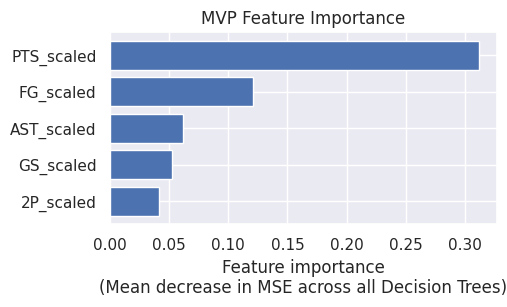

In [ ]:
# MVP feature selection

# number of decision trees in the forest
n_estimators = 100
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

# fill na with 0 (this is because its usually %s where the denominator is 0)
normalized_data = normalized_data.fillna(0)

#x values
x_feat_list = ['G_scaled', 'GS_scaled', 'MP_scaled',
       'FG_scaled', 'FGA_scaled', 'FG%_scaled', '3P_scaled', '3PA_scaled',
       '3P%_scaled', '2P_scaled', '2PA_scaled', '2P%_scaled', 'eFG%_scaled',
       'FT_scaled', 'FTA_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled',
       'TRB_scaled', 'AST_scaled', 'BLK_scaled', 'BLK_scaled', 'TOV_scaled',
       'PF_scaled', 'PTS_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y = normalized_data.loc[:, 'MVP'].values

# fit random forest to data
rf_reg.fit(x,y)

# set and use plot_feat_import to plot the bar graph of feature importances
sns.set()
plot_feat_import(x_feat_list, rf_reg.feature_importances_, limit=5)
plt.title('MVP Feature Importance')

Text(0.5, 1.0, 'DPOY Feature Importance')

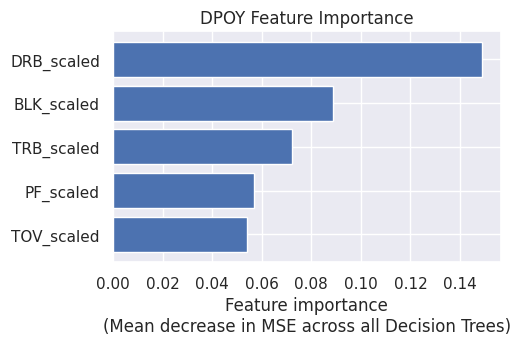

In [ ]:
# DPOY feature selection

# number of decision trees in the forest
n_estimators = 100
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

# fill na with 0 (this is because its usually %s where the denominator is 0)
normalized_data = normalized_data.fillna(0)

#x values
x_feat_list = ['G_scaled', 'GS_scaled', 'MP_scaled',
       'FG_scaled', 'FGA_scaled', 'FG%_scaled', '3P_scaled', '3PA_scaled',
       '3P%_scaled', '2P_scaled', '2PA_scaled', '2P%_scaled', 'eFG%_scaled',
       'FT_scaled', 'FTA_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled',
       'TRB_scaled', 'AST_scaled', 'BLK_scaled', 'BLK_scaled', 'TOV_scaled',
       'PF_scaled', 'PTS_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y = normalized_data.loc[:, 'DPOY'].values

# fit random forest to data
rf_reg.fit(x,y)

# set and use plot_feat_import to plot the bar graph of feature importances
sns.set()
plot_feat_import(x_feat_list, rf_reg.feature_importances_, limit=6)
plt.title('DPOY Feature Importance')

Text(0.5, 1.0, 'Sixth Man Feature Importance')

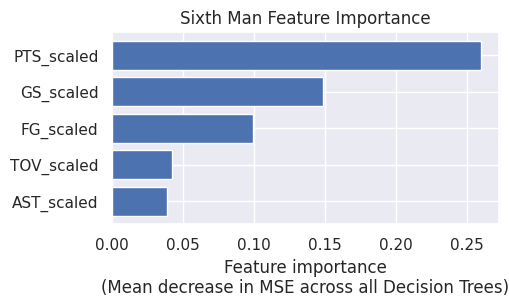

In [ ]:
# Sixth man feature importance

# number of decision trees in the forest
n_estimators = 100
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

# fill na with 0 (this is because its usually %s where the denominator is 0)
normalized_data = normalized_data.fillna(0)


#x values
x_feat_list = ['G_scaled', 'GS_scaled', 'MP_scaled',
       'FG_scaled', 'FGA_scaled', 'FG%_scaled', '3P_scaled', '3PA_scaled',
       '3P%_scaled', '2P_scaled', '2PA_scaled', '2P%_scaled', 'eFG%_scaled',
       'FT_scaled', 'FTA_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled',
       'TRB_scaled', 'AST_scaled', 'BLK_scaled', 'BLK_scaled', 'TOV_scaled',
       'PF_scaled', 'PTS_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y = normalized_data.loc[:, 'Sixth Man'].values

# fit random forest to data
rf_reg.fit(x,y)

# set and use plot_feat_import to plot the bar graph of feature importances
sns.set()
plot_feat_import(x_feat_list, rf_reg.feature_importances_, limit=5)
plt.title('Sixth Man Feature Importance')

For the classifier and regressor below, we used these top 5 feature graphs to decide which features to use for each award.

# Classifier



### Cross Validation and Testing on 1992-2022 Data


In [ ]:
df_2023 = pd.read_csv('MVP Voting - 2023 Normalized.csv')
mvp_normalized_data = pd.read_csv('MVP Voting - All 30 Seasons.csv')

In [ ]:
def get_cv_acc_knn(x, y_true, k, n_splits=5):
    """ computes cross validated accuracy of a KNN classifier

    Args:
        x (np.array): (n_sample, n_feat) features
        y (np.array): (n_sample) target variable
        k (int): number of nearest neighbors in k-NN classifier

    Returns:
        acc (float): cross validated accuracy
    """
    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # "Stratified" ensures (roughly) same number of species across folds
    kfold = StratifiedKFold(n_splits=n_splits)

    # initialize an empty array same size & datatype as y_true
    y_pred = np.empty_like(y_true)
    for train_idx, test_idx in kfold.split(x, y_true):
        # split test / training data
        x_train = x[train_idx, :]
        x_test = x[test_idx, :]
        y_true_train = y_true[train_idx]

        # train on training data
        knn_classifier.fit(x_train, y_true_train)

        # predict on the testing data
        y_pred[test_idx] = knn_classifier.predict(x_test)

    return accuracy_score(y_true, y_pred)

Above, we used the accuracy code from class. This is applied below, in order to find the best k value.

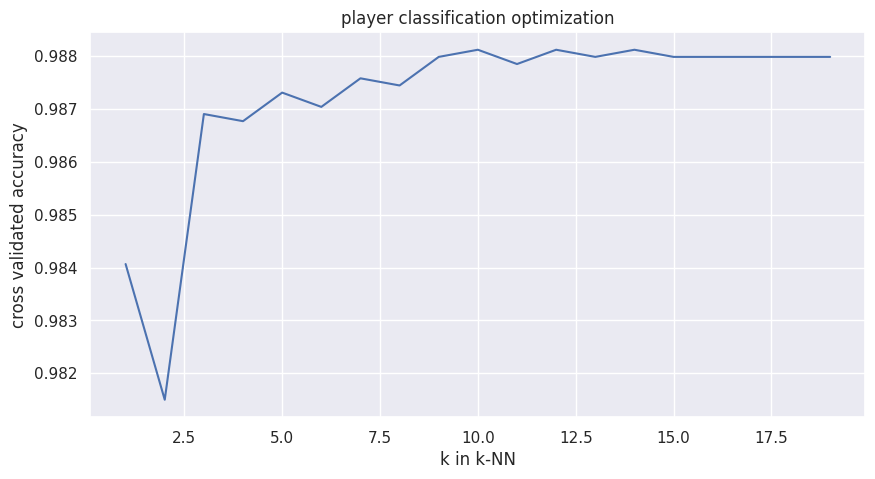

In [ ]:
#these are the most important features (all the features in each of the awards' top 5 feature importance graphs combined)
x_feat_list = ['PTS_scaled', 'AST_scaled', 'TRB_scaled', 'FG_scaled', 'GS_scaled', '2P_scaled', 'DRB_scaled', 'BLK_scaled', 'PF_scaled', 'TOV_scaled']

y_feat = 'Award'

#get values
x = mvp_normalized_data.loc[:, x_feat_list].values
y_true = mvp_normalized_data.loc[:, y_feat].values

# compute cross validated accuracy of each k
k_all = np.array(range(1, 20))
acc = np.empty(k_all.shape, dtype=float)
for idx, k in enumerate(k_all):
    acc[idx] = get_cv_acc_knn(x, y_true, k, n_splits=5)

#plot the cross validated accuracy of k=1 to k=20
plt.plot(k_all, acc)
plt.xlabel('k in k-NN')
plt.ylabel('cross validated accuracy')
plt.title('player classification optimization')
plt.gcf().set_size_inches(10, 5)

Even though according to the graph k=3 has a higher accuracy than k=2, k=2 ends up producing more correct award winners, so we use k=2 instead. Furthermore the difference in accuracy is .4%, which is a miniscule amount. The entire range on the y axis is less than .01, so we figure that the way to choose the k is insanely arbitrary.

In [ ]:
# set k value
k = 2

# set feature list for x values (features determined by feature importance above)
new_feat_list = ['PTS_scaled', 'AST_scaled', 'TRB_scaled', 'FG_scaled', 'GS_scaled', '2P_scaled', 'DRB_scaled', 'BLK_scaled', 'PF_scaled', 'TOV_scaled']

# set y value to the award
y_feat = 'Award'

#throw out rows with missing data
mvp_normalized_data.dropna(how='any', inplace=True)

x = mvp_normalized_data.loc[:, new_feat_list].values
y_true = mvp_normalized_data.loc[:, y_feat].values

# initialize a knn_classifier- look at k nearest neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
knn_classifier.fit(x, y_true)

# construction of kfold object
kfold = StratifiedKFold(n_splits=3)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

#create a copy of the dataset
df_copy = copy(mvp_normalized_data)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]

    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each award
    y_pred[test_idx] = knn_classifier.predict(x_test)

#add the predictions to copied data set
df_copy['Award Pred'] = y_pred

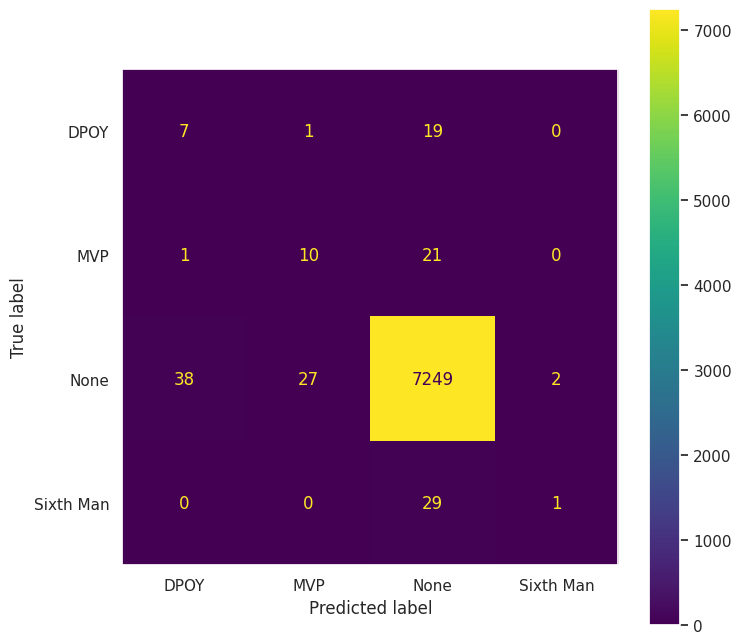

In [ ]:
# set the confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

# set plot size
plt.gcf().set_size_inches(8, 8)

# turns grid on confusion matrix off
plt.grid(False)

In [ ]:
# Limit the df to only the players that are predicted to win awards
s_df = df_copy.loc[:, 'Award Pred']
s_bool = s_df != 'None'
df_copy.loc[s_bool, :]

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled,MVP,DPOY,Sixth Man,Award,Award Pred
110,1992,John Stockton,29,UTA,12.31875,2.54495,4.34867,2.49635,2.61617,10.79333,...,5.58487,0.42382,4.67735,4.11716,2.73299,18,0.0,0.0,None,MVP
307,1993,Frank Brickowski,33,MIL,10.78311,2.06473,3.78643,3.10633,2.82361,13.17371,...,2.31673,1.09620,4.12446,4.84384,2.86825,0,0.0,0.0,None,DPOY
321,1993,Hakeem Olajuwon,30,HOU,13.39720,2.64543,4.76319,4.63699,4.33546,12.78696,...,3.47510,6.57719,4.25750,4.97839,4.42967,647,73.0,0.0,DPOY,MVP
339,1993,John Stockton,30,UTA,13.39720,2.64543,4.20849,2.38602,2.44565,11.74757,...,4.63346,0.46980,4.25750,3.63288,2.56276,1,0.0,0.0,None,MVP
367,1993,Lionel Simmons,24,SAC,11.27325,2.19377,4.37731,3.06131,3.40167,10.73234,...,2.70285,0.93960,3.72532,3.90198,3.03797,0,0.0,0.0,None,DPOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,2020,Hassan Whiteside,30,POR,16.74216,2.27352,4.75918,2.96960,2.26725,8.97919,...,1.10310,6.04963,2.03517,5.14529,2.43515,0,3.0,0.0,None,DPOY
6980,2021,Rudy Gobert,28,UTA,12.00608,2.88251,4.61034,2.36729,1.72145,9.06206,...,1.79575,6.50938,1.97303,4.04962,2.20747,8,464.0,0.0,DPOY,DPOY
7191,2022,Nikola Jokić,26,DEN,12.71071,2.63462,5.28133,5.06929,4.02008,8.20655,...,4.36827,2.20476,4.49230,4.30730,4.69038,875,0.0,0.0,MVP,MVP
7199,2022,DeMar DeRozan,32,CHI,13.05424,2.70583,5.69122,5.02008,4.58789,7.09452,...,2.62096,0.73492,2.83724,3.81031,4.82884,1,0.0,0.0,None,MVP


The code above has seperated all seasons in the 30 seasons dataframe into an award-worthy or non-award-worthy season. There isn't only one winner per season per award; rather all seasons were sorted into whether or not they deserved an award by the 30 season total standard.

# Historical Classifier Visualizations



The goal with the code below is to make a visualization of the classifier's data above, and to graph all award worthy seasons.

In [ ]:
# make a copy of df_copy above and label it the award prediction for the classifier
df_award_pred = copy(df_copy)

#iterate through each row and remove the rows which have no awards for Award and Award Pred
for idx, row in df_award_pred.iterrows():
    if row['Award'] == 'None' and row['Award Pred'] == 'None':
        df_award_pred = df_award_pred.drop(idx)

In [ ]:
#intialize empty lists for the 3 awards
dpoy_list = list()
mvp_list = list()
sixth_man_list = list()

#go through each row of the dataframe and add a players name to the respective award list
for idx, row in df_copy.iterrows():
    if row['Award Pred'] == 'MVP':
        mvp_list.append(row['Player'])
    if row['Award Pred'] == 'DPOY':
        dpoy_list.append(row['Player'])
    if row['Award Pred'] == 'Sixth Man':
        sixth_man_list.append(row['Player'])

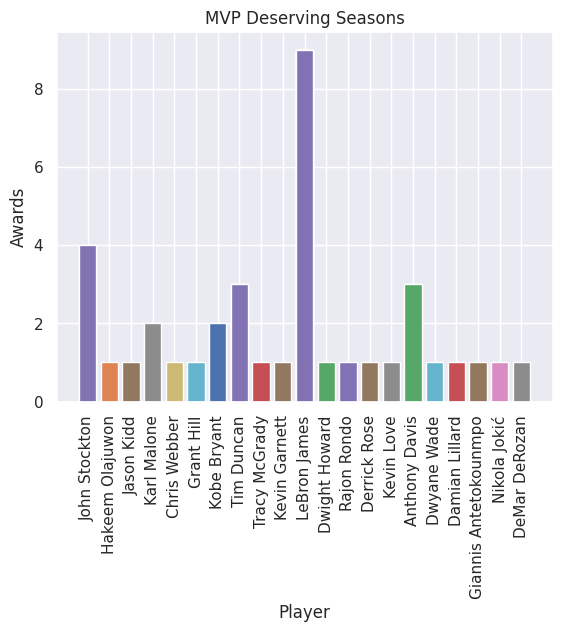

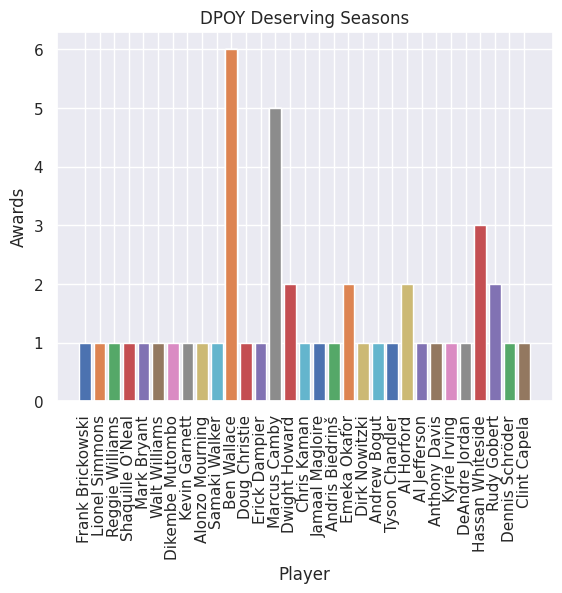

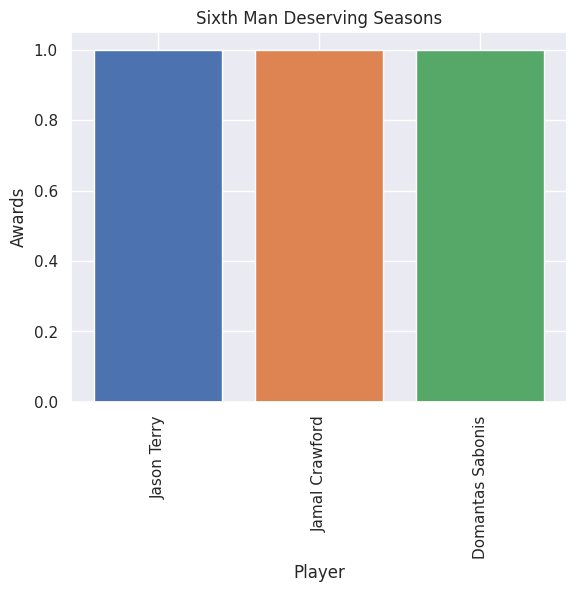

In [ ]:
#create the chart of MVP deserving seasons determined by the classifier
plt.figure()
plt.xticks(rotation=90)
plt.title('MVP Deserving Seasons')
plt.xlabel('Player')
plt.ylabel('Awards')
for item in mvp_list:
    plt.bar(item, mvp_list.count(item))

#create the chart of DPOY deserving seasons determined by the classifier
plt.figure()
plt.xticks(rotation=90)
plt.title('DPOY Deserving Seasons')
plt.xlabel('Player')
plt.ylabel('Awards')
for item in dpoy_list:
    plt.bar(item, dpoy_list.count(item))

#create the chart of Sixth Man deserving seasons determined by the classifier
plt.figure()
plt.xticks(rotation=90)
plt.title('Sixth Man Deserving Seasons')
plt.xlabel('Player')
plt.ylabel('Awards')
for item in sixth_man_list:
    plt.bar(item, sixth_man_list.count(item))

There are some very interesting findings here. First of all, the amount of players deserving DPOY awards in extremely interesting. Some of the names are surprising -- Kobe Bryant, Clint Capela. However, we see some basketball defensive greats: Ben Wallace and Marcus Camby towering over the rest of the field, Rudy Gobert taking home two, and Shaq being worthy of one as well. The classifier cleary does not do so well with the SMOTY, as only 3 winners are predicted. The classifier also determines Lebron James to have 9 MVP wins, when in reality he only has 4, and does not have Michael Jordan to win a single MVP.

# Classifier Predictions for 2023

We then decided to see if there were any award worthy seasons in 2023, running the classifier and predicting the awards based off statistics from the 2022-23 NBA season.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from sklearn.neighbors import KNeighborsClassifier

#drop NaN
df_2023.dropna(axis=0, inplace=True)
mvp_normalized_data.dropna(axis=0, inplace=True)

k = 2

#feature list
new_feat_list = ['PTS_scaled', 'AST_scaled', 'TRB_scaled', 'FG_scaled', 'GS_scaled', '2P_scaled', 'DRB_scaled', 'BLK_scaled', 'PF_scaled', 'TOV_scaled']

y_feat = 'Award'

#get the "true" data
x_true = mvp_normalized_data.loc[:, new_feat_list].values
y_true = mvp_normalized_data.loc[:, y_feat].values

#get the data for the predicitons
x_pred = df_2023.loc[:, new_feat_list]

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit on the 1992-2022 stats
knn_classifier.fit(x_true, y_true)

# estimate awards
y_pred = knn_classifier.predict(x_pred)

#copy dataframe
df_copy_pred = copy(df_2023)

#add award predictions
df_copy_pred['Award Pred'] = y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#find predictions for this years wards
s_df = df_copy_pred.loc[:, 'Award Pred']

s_bool = s_df != 'None'

df_copy_pred.loc[s_bool, :]

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,ORB_scaled,DRB_scaled,TRB_scaled,AST_scaled,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled,Award Pred
2,2023,Jayson Tatum,24,BOS,11.073352,2.645693,5.359932,4.285536,4.470805,6.480251,...,1.416594,4.365779,3.733968,2.368566,3.253957,1.543777,3.626702,3.508180,4.597636,MVP
29,2023,Lauri Markkanen,25,UTA,9.876233,2.359672,4.996793,3.804507,3.665636,6.939152,...,2.575625,3.798795,3.649105,0.978321,1.774886,1.323237,2.376115,3.348717,3.910282,DPOY
34,2023,Nikola Jokić,27,DEN,10.325153,2.466930,4.895114,4.110617,3.135920,8.788666,...,3.090750,5.329653,5.006911,5.046076,3.845586,1.543777,4.502113,3.986568,3.742262,MVP
52,2023,Giannis Antetokounmpo,28,MIL,9.427313,2.252414,4.662705,4.897756,4.301295,7.690083,...,2.833187,5.443049,5.006911,2.934963,2.366514,1.764316,4.877290,4.943345,4.750381,MVP
97,2023,Ivica Zubac,25,LAC,11.372632,2.717198,4.154311,1.880388,1.440828,8.816478,...,3.992219,3.855493,4.200714,0.514906,1.183257,2.867014,1.875881,4.624419,1.649650,DPOY


What we found is that there are 5 award worthy seasons: Jayson Tatum, Nikola Jokic, and Giannis Antetokounmpo worthy of MVP and Lauri Markkanen and Ivica Zubac worthy of DPOY. These are surprising results -- the fact that Tatum is in the top 3 and the two DPOY candidates are not extremely seriously considered for the award this year. But Nikola Jokic and Giannis are 2 of the 3 nominees for the award this year, so their inclusion is not surprising.

# Historical RF Regression Results

The classifier above did not satisfy us, and we wanted one winner per year. So we used the data for award votes to try and determine who would be the single winner for each season. One difference here is that each award gets its own regressor, which means tha the feature lists are more fine tuned, which we hoped would help the results.

In [ ]:
normalized_data = pd.read_csv('MVP Voting - All 30 Seasons.csv')

In [ ]:
# MVP Random Forest Regressor

# define the splits, depth, and estimators values
n_splits = 10
n_estimators = 100

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

#x values ta
x_feat_list = ['PTS_scaled', 'FG_scaled', 'AST_scaled', 'GS_scaled', '2P_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y_true = normalized_data.loc[:, 'MVP'].values

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
rf_reg.fit(x, y_true)

# allocate an empty array to store predictions in
y_pred = np.empty_like(y_true)

#create a copy of the dataset
df_copy = copy(normalized_data)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]

    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    rf_reg.fit(x_train, y_true_train)

    # estimate each award
    y_pred[test_idx] = rf_reg.predict(x_test)

#add the predictions to copied data set
df_copy['MVP Pred'] = y_pred

# sort data frame by top award vote winner per seasons
mvp = df_copy.groupby('Year')['MVP Pred'].transform('max') == df_copy['MVP Pred']

# create a count list that contains each player that won an mvp
mvp_count_list = list()
for idx, row in df_copy[mvp].iterrows():
    mvp_count_list.append(row['Player'])

In [ ]:
# DPOY Random Forest Regressor

# define the splits, depth, and estimators values
n_splits = 10
n_estimators = 100

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

#x values
x_feat_list = ['DRB_scaled', 'BLK_scaled', 'TRB_scaled', 'PF_scaled', 'TOV_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y_true = normalized_data.loc[:, 'DPOY'].values

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
rf_reg.fit(x, y_true)

# allocate an empty array to store predictions in
y_pred = np.empty_like(y_true)

#create a copy of the dataset
df_copy = copy(normalized_data)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]

    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    rf_reg.fit(x_train, y_true_train)

    # estimate each award
    y_pred[test_idx] = rf_reg.predict(x_test)

#add the predictions to copied data set
df_copy['DPOY Pred'] = y_pred

# sort data frame by top award vote winner per seasons
dpoy = df_copy.groupby('Year')['DPOY Pred'].transform('max') == df_copy['DPOY Pred']

# create a count list of each player that won DPOY
dpoy_count_list = list()
for idx, row in df_copy[dpoy].iterrows():
    dpoy_count_list.append(row['Player'])

In [ ]:
# Sixth Man Random Forest Regressor

# define the splits, depth, and estimators values
n_splits = 10
n_estimators = 100

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

#x values
x_feat_list = ['PTS_scaled', 'GS_scaled', 'FG_scaled', 'AST_scaled', 'TOV_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y_true = normalized_data.loc[:, 'Sixth Man'].values

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
rf_reg.fit(x, y_true)

# allocate an empty array to store predictions in
y_pred = np.empty_like(y_true)

#create a copy of the dataset
df_copy = copy(normalized_data)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]

    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    rf_reg.fit(x_train, y_true_train)

    # estimate each award
    y_pred[test_idx] = rf_reg.predict(x_test)

#add the predictions to copied data set
df_copy['Sixth Man Pred'] = y_pred

# sort data frame by top award vote winner per seasons
sm = df_copy.groupby('Year')['Sixth Man Pred'].transform('max') == df_copy['Sixth Man Pred']

# create a count list of each player that won sixth man of the year
sm_count_list = list()
for idx, row in df_copy[sm].iterrows():
    sm_count_list.append(row['Player'])

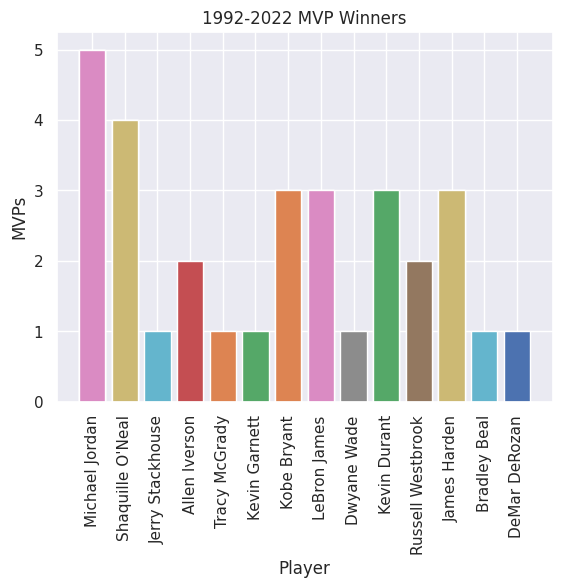

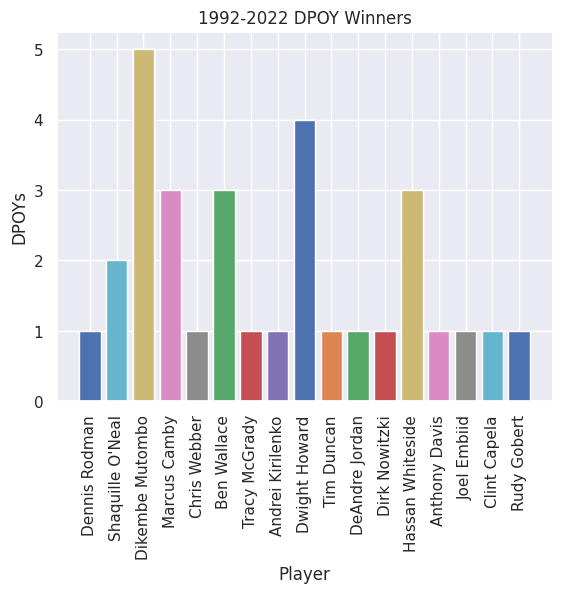

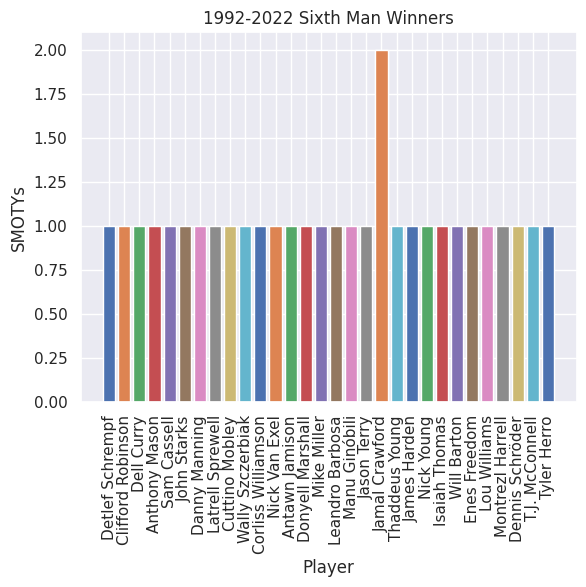

In [ ]:
#create plot of MVP winners
plt.figure()
plt.xticks(rotation=90)
plt.title('1992-2022 MVP Winners')
plt.xlabel('Player')
plt.ylabel('MVPs')
for item in mvp_count_list:
    plt.bar(item, mvp_count_list.count(item))

#create plot of DPOY winners
plt.figure()
plt.xticks(rotation=90)
plt.title('1992-2022 DPOY Winners')
plt.xlabel('Player')
plt.ylabel('DPOYs')
for item in dpoy_count_list:
    plt.bar(item, dpoy_count_list.count(item))

#create plot of Sixth Man winners
plt.figure()
plt.xticks(rotation=90)
plt.title('1992-2022 Sixth Man Winners')
plt.xlabel('Player')
plt.ylabel('SMOTYs')
for item in sm_count_list:
    plt.bar(item, sm_count_list.count(item))

Because we are using cross-validation, the regressor will predict the awards differently each time it runs. So, here are the linked graphs that we are using for analysis of our results from the historical regression predictions.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/vZgGNF7/1992-2022-MVP-votes.png" alt="1992-2022-MVP-votes" border="0"></a>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/98V0nPd/1992-2022-DPOY-Votes.png" alt="1992-2022-DPOY-Votes" border="0"></a>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/kHjznjL/1992-2022-SMOTY-Votes.png" alt="1992-2022-SMOTY-Votes" border="0"></a>



One this we noticed in the visualizations above is that there were multiple repeat MVP and DPOY winners, which is something we saw less with SMOTY. This is reflective of real life, where sixth man of the year winners often earn a starting spot, taking them out of contention for the award in the future, while MVPs and DPOYs often reign at the top or near the top of their leagues for at least a few years.

These results pass the eye test as more accurate than the classifiers, with people like Lebron James and Michael Jordan taking home multiple MVPs and Ben Wallace and Dikembe Mutombo taking home multiple DPOYs.

# 2023 Regressor Predictions

Finally, we decided to fit the regressors to determine the top 10 vote getters for each award for the 2022-2023 NBA season.

In [ ]:
df_2023_stats = pd.read_csv('MVP Voting - 2023 Normalized.csv')

In [ ]:
# 2023 MVP Regressor Predictions

# define the splits, depth, and estimators values
n_splits = 10
n_estimators = 100

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

#x values
x_feat_list = ['PTS_scaled', 'FG_scaled', 'AST_scaled', 'GS_scaled', '2P_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y_true = normalized_data.loc[:, 'MVP'].values

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
rf_reg.fit(x, y_true)

# allocate an empty array to store predictions in
y_pred = np.empty_like(y_true)

#get the data for the predicitons
x_pred = df_2023_stats.loc[:, x_feat_list]

# estimate awards
y_pred = rf_reg.predict(x_pred)

#copy dataframe
df_copy_pred = copy(df_2023_stats)

#add award predictions
df_copy_pred['MVP Pred'] = y_pred

df_top_10_mvp = df_copy_pred.nlargest(n=10, columns = 'MVP Pred')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# 2023 DPOY Regressor Predictions

# define the splits, depth, and estimators values
n_splits = 10
n_estimators = 100

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

#x values
x_feat_list = ['DRB_scaled', 'BLK_scaled', 'TRB_scaled', 'PF_scaled', 'TOV_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y_true = normalized_data.loc[:, 'DPOY'].values

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
rf_reg.fit(x, y_true)

# allocate an empty array to store predictions in
y_pred = np.empty_like(y_true)

#get the data for the predicitons
x_pred = df_2023_stats.loc[:, x_feat_list]

# estimate awards
y_pred = rf_reg.predict(x_pred)

#copy dataframe
df_copy_pred = copy(df_2023_stats)

#add award predictions
df_copy_pred['DPOY Pred'] = y_pred

df_top_10_dpoy = df_copy_pred.nlargest(n=10, columns = 'DPOY Pred')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# 2023 SMOTY Regressor Predictions

# define the splits, depth, and estimators values
n_splits = 10
n_estimators = 100

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

#x values
x_feat_list = ['PTS_scaled', 'GS_scaled', 'FG_scaled', 'TOV_scaled', 'AST_scaled']

x = normalized_data.loc[:, x_feat_list].values

# get the true y values
y_true = normalized_data.loc[:, 'Sixth Man'].values

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
rf_reg.fit(x, y_true)

# allocate an empty array to store predictions in
y_pred = np.empty_like(y_true)

#get the data for the predicitons
x_pred = df_2023_stats.loc[:, x_feat_list]

# estimate awards
y_pred = rf_reg.predict(x_pred)

#copy dataframe
df_copy_pred = copy(df_2023_stats)

#add award predictions
df_copy_pred['SM Pred'] = y_pred

df_top_10_sm = df_copy_pred.nlargest(n=10, columns = 'SM Pred')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


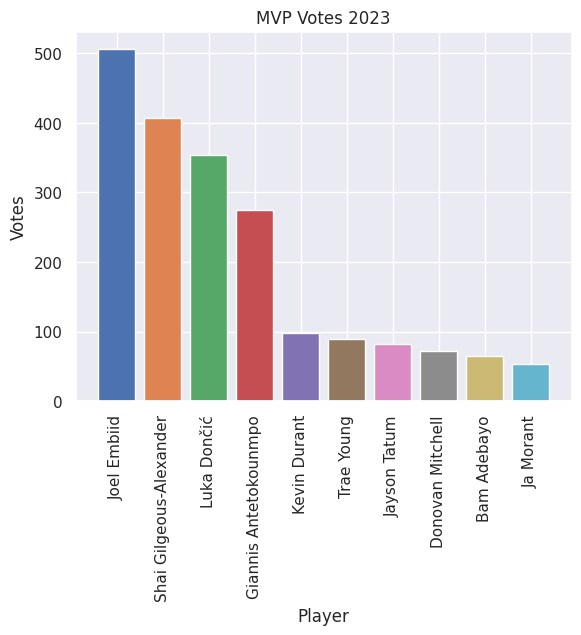

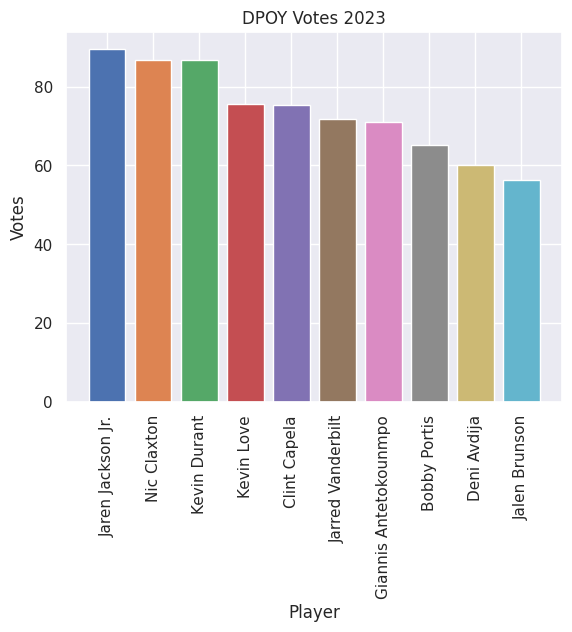

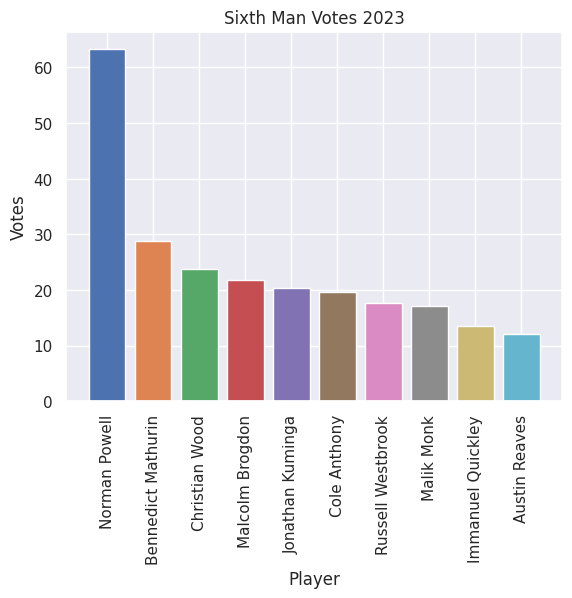

In [ ]:
#create plot of MVP vote receivers for 2023
plt.figure()
plt.xticks(rotation=90)
plt.title('MVP Votes 2023')
plt.xlabel('Player')
plt.ylabel('Votes')
for idx, row in df_top_10_mvp.iterrows():
    plt.bar(row['Player'], row['MVP Pred'])

#create plot of top 10 DPOY vote recievers for 2023
plt.figure()
plt.xticks(rotation=90)
plt.title('DPOY Votes 2023')
plt.xlabel('Player')
plt.ylabel('Votes')
for idx, row in df_top_10_dpoy.iterrows():
    plt.bar(row['Player'], row['DPOY Pred'])

#create plot of top 10 Sixth Man vote recievers for 2023
plt.figure()
plt.xticks(rotation=90)
plt.title('Sixth Man Votes 2023')
plt.xlabel('Player')
plt.ylabel('Votes')
for idx, row in df_top_10_sm.iterrows():
    plt.bar(row['Player'], row['SM Pred'])

Just like the historical predictions, sometimes the RF Regression model will predict different results, so we are linking the graphs we are analyzing.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/9Z6hgwt/MVP-Votes-2023.png" alt="MVP-Votes-2023" border="0"></a>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/GQRvrBP/2023-DPOY-Votes.png" alt="2023-DPOY-Votes" border="0"></a>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/D1jkfBN/2023-SMOTY-Votes.png" alt="2023-SMOTY-Votes" border="0"></a>



# Discussion


## Results

The MVP and DPOY results were not shocking. Jaren Jackson Jr. actually already has won the DPOY. Joel Embiid, Shai Gilgeous-Alexander, and Luka Doncic were all at some point in the season very highly considered for the award, and Joel Embiid is the current media favorite.

There are some really suprising results mixed in, however. For example, the Sixth Man vote list is confusing. Malcom Brogdon comes 4th as the real life favorite right now, and many of the names listed here aren't seriously considered for the award. Jalen Brunson and Kevin Love getting DPOY votes would be a shocker, as these two are seen as majorly offensive players.

### Ethical Implications

While our overall topic is fairly free of larger world consequences, there are some ethical implications of using a machine learning model to predict NBA end of season awards. Firstly, there is always a risk of bias, and a model based on past awards can further perpetuate existing biases. Furthermore, there has to be a transparecy of how the model works so that it doesn't immediately lead to mistrust of the system (such as what happened with the NBA Draft Lottery). Most prominently, many top NBA players' contracts and salaries are dependent upon the honors they recieve: if the model causes them to miss out on awards repeatedly, players stand to lose millions of dollars, and potentially even motivation for playing at high levels. It could change the way both players and organizations approach the regular season and cause play style changes across the league.

## Final Takeaway

We believe, while this could be used to predict NBA award winners on an amateur level, it should not be used by those deciding votes and should not be used for anything with serious implications, such as betting or live analysis. These results are not ground-breaking, unexpected, and should not be taken at face value. For this project to work, a significant amount of improvement on these methods should be done in order to create a more comprehensive model.